CSAT and NPS Scores vs. Churn: Lower CSAT and NPS scores are associated with higher churn

Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Datasets

In [63]:
product_df = pd.read_csv("product.csv")
feedback_df = pd.read_csv("customer_feedback.csv")

 Convert date columns to datetime format

In [64]:
product_df["score_date"] = pd.to_datetime(product_df["score_date"], errors="coerce")
feedback_df["score_date"] = pd.to_datetime(feedback_df["score_date"], errors="coerce")

Merge data on id and score_date

In [65]:
merged_df = pd.merge(product_df, feedback_df, on=["id", "score_date"], how="inner")

Calculate total product count

In [66]:
merged_df["total_products"] = merged_df["team_plus"] + merged_df["pro_plus"] + merged_df["ent_plus"]

Compute churn_flag

In [70]:


merged_df = merged_df.sort_values(by=["id", "score_date"])

merged_df["prev_total_products"] = merged_df.groupby("id")["total_products"].shift(1)
merged_df["churn_flag"] = (merged_df["total_products"] < merged_df["prev_total_products"]).astype(int)
#convert date format
merged_df["year_month"] = merged_df["score_date"].dt.to_period("M").astype(str)

Aggregate data at the month level

In [ ]:
monthly_churn = merged_df.groupby(["year_month", "churn_flag"]).agg(
    avg_csat=("csat_score", "mean"),
    avg_nps=("nps_score", "mean")
).reset_index()


Plotting

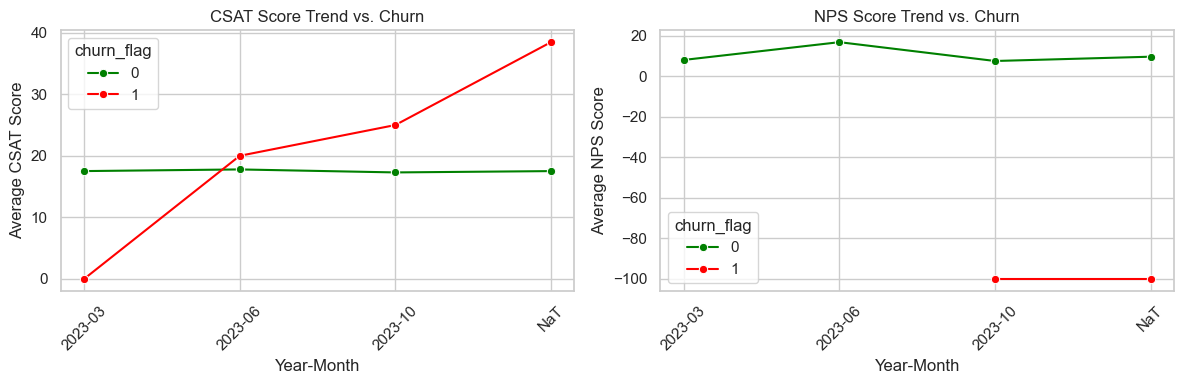

In [71]:
colors = {0: "green", 1: "red"}


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# CSAT Score Trend vs. Churn
sns.lineplot(data=monthly_churn, x="year_month", y="avg_csat", hue="churn_flag", palette=colors, marker="o", ax=axes[0])
axes[0].set_title("CSAT Score Trend vs. Churn")
axes[0].set_xlabel("Year-Month")
axes[0].set_ylabel("Average CSAT Score")
axes[0].tick_params(axis='x', rotation=45)

# NPS Score Trend vs. Churn
sns.lineplot(data=monthly_churn, x="year_month", y="avg_nps", hue="churn_flag", palette=colors, marker="o", ax=axes[1])
axes[1].set_title("NPS Score Trend vs. Churn")
axes[1].set_xlabel("Year-Month")
axes[1].set_ylabel("Average NPS Score")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
